# Problem 1

## Problem 1 a

In [2]:
from utils import plot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

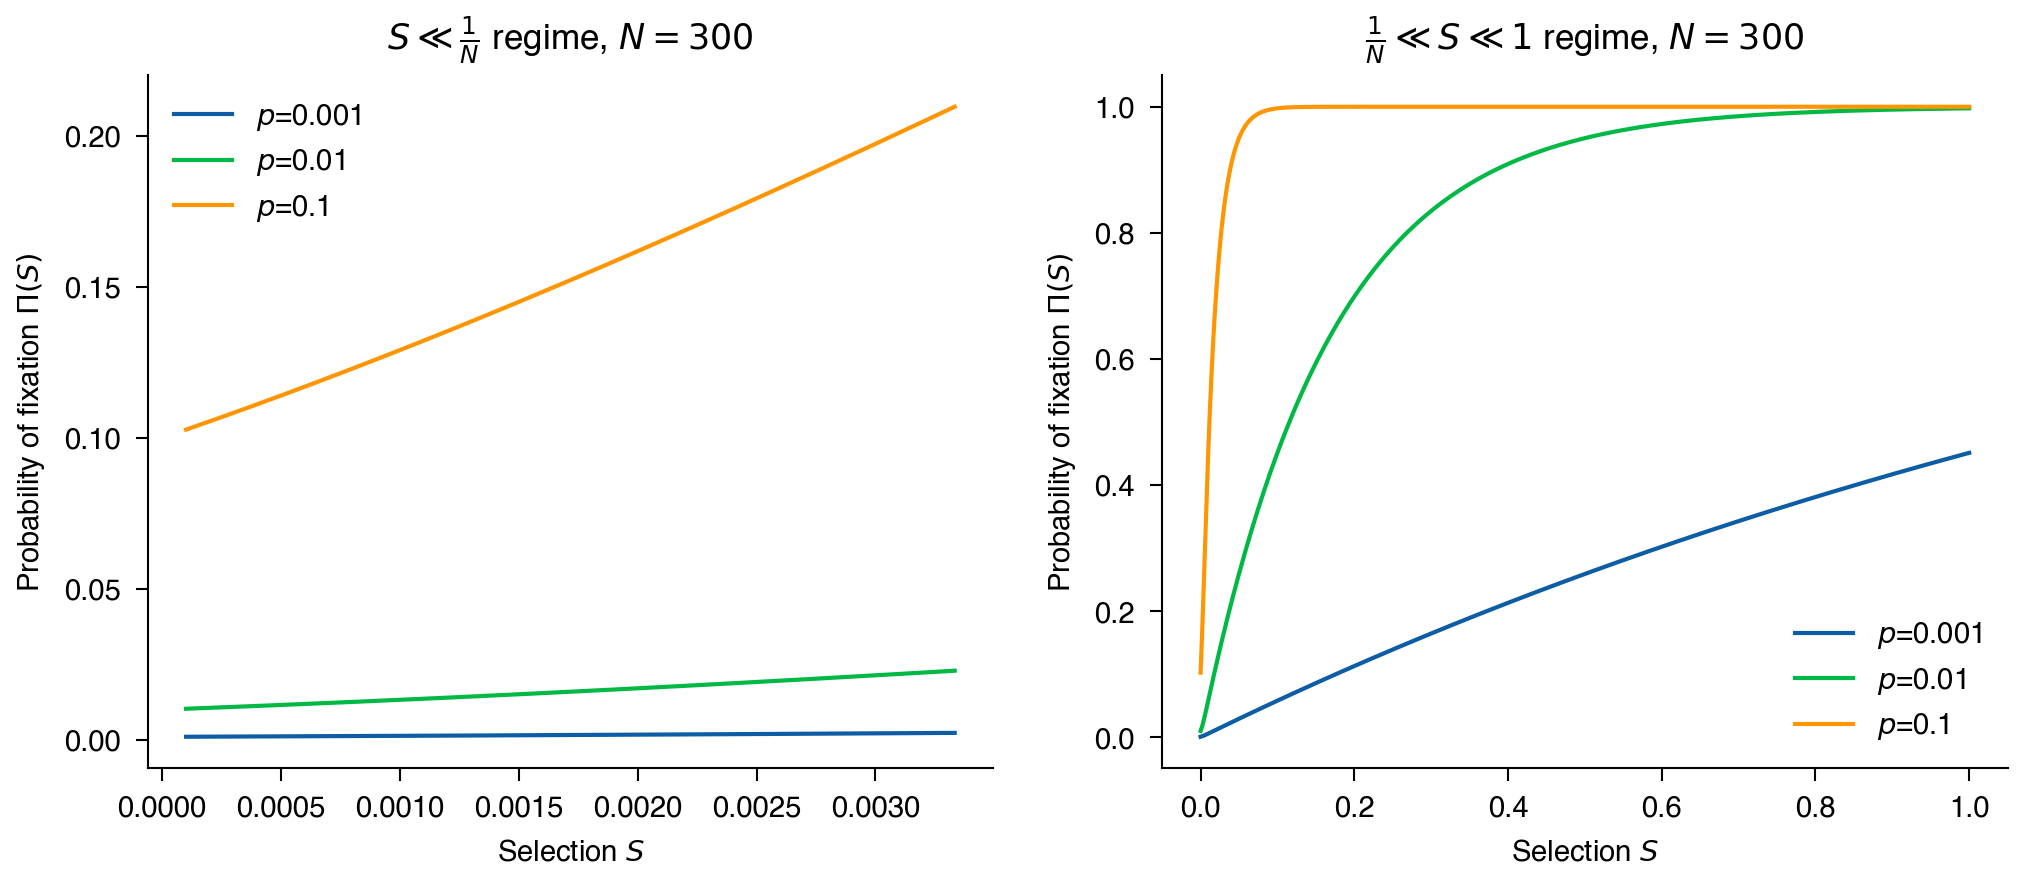

In [3]:
def probability_of_fixation(N,S,p):
    return (1-np.exp(-2*N*S*p))/(1-np.exp(-2*N*S))
N = 300
ps = [0.001,0.01,0.1]

fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,3)

Ss = np.linspace(start=1e-4, stop=1/N, num=500)
ax[0].set_ylabel("Probability of fixation $\Pi(S)$")
ax[0].set_xlabel("Selection $S$")
ax[0].set_title(r"$S \ll \frac{1}{N}$ regime, $N=300$")
for p in ps:
    sns.lineplot(x=Ss,y=probability_of_fixation(N,Ss,p), ax=ax[0], label=f"$p$={p:.2g}")

Ss = np.linspace(start=1e-4, stop=1, num=500)
ax[1].set_ylabel("Probability of fixation $\Pi(S)$")
ax[1].set_xlabel("Selection $S$")
ax[1].set_title(r"$\frac{1}{N} \ll S \ll 1$ regime, $N=300$")
for p in ps:
    sns.lineplot(x=Ss,y=probability_of_fixation(N,Ss,p), ax=ax[1], label=f"$p$={p:.2g}")

## Problem 1 b

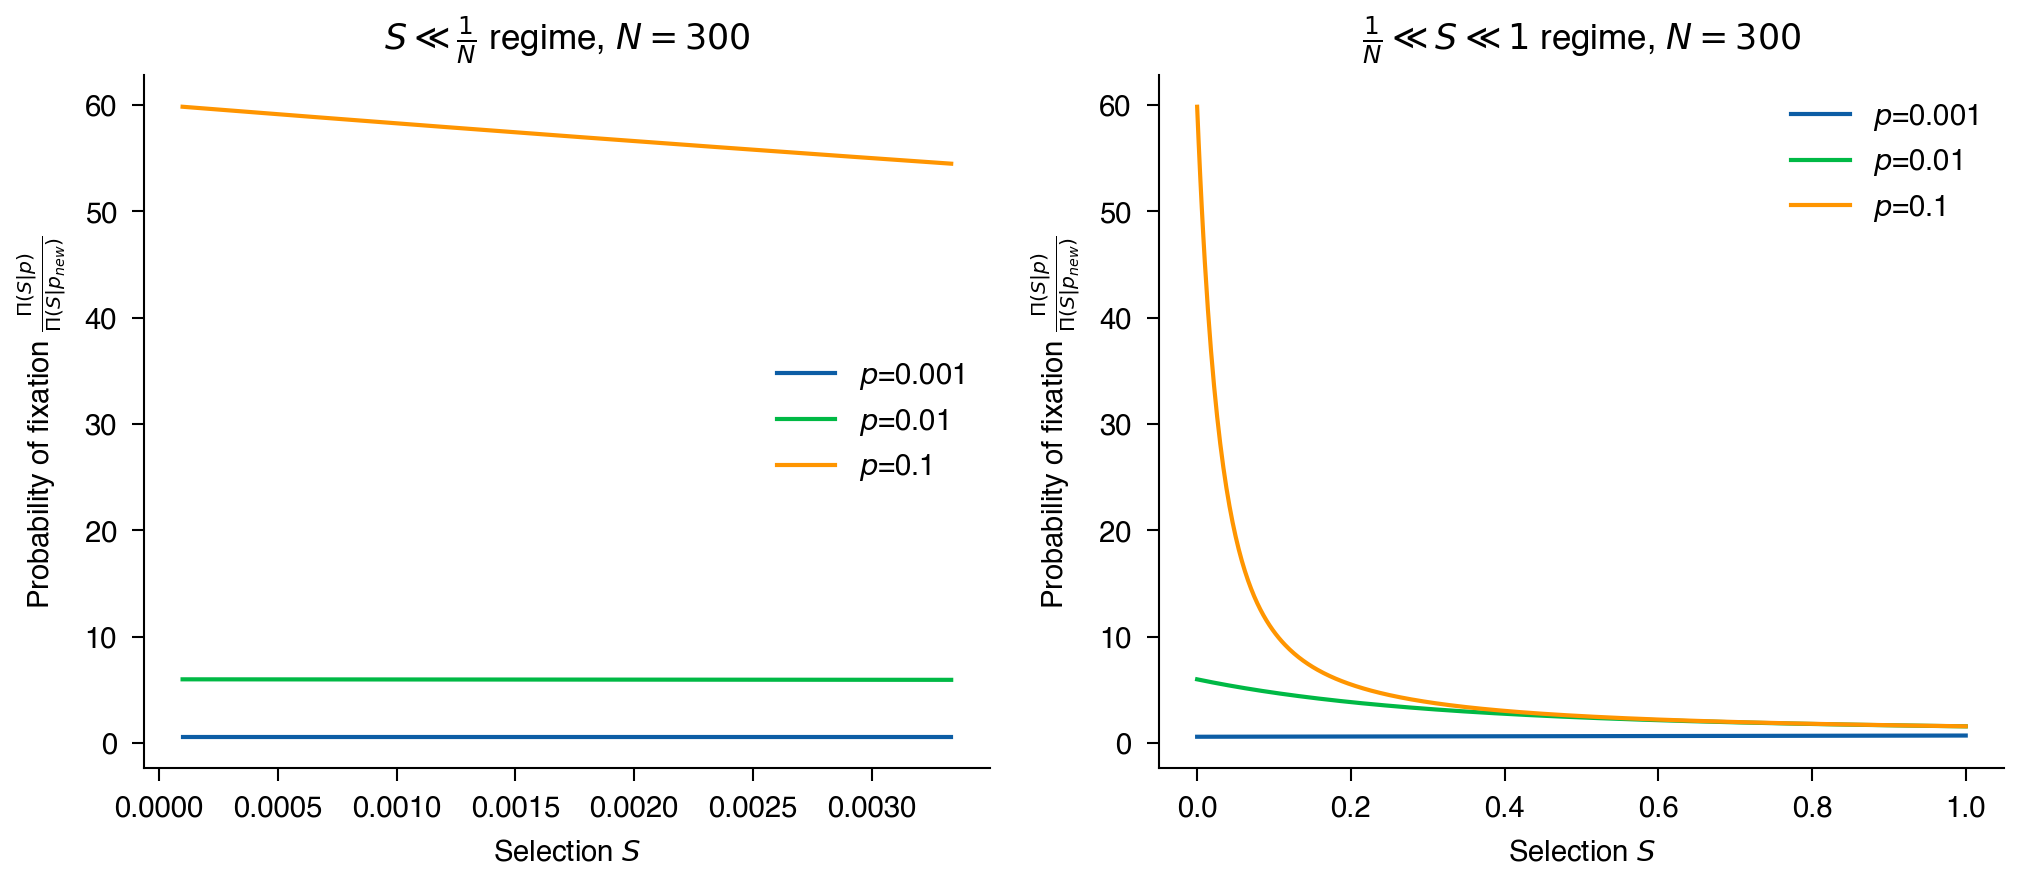

In [9]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,3)

N = 300
p_new = 1/(2*N)
ps = [0.001,0.01,0.1]


Ss = np.linspace(start=1e-4, stop=1/N, num=500)
ax[0].set_ylabel(r"Probability of fixation $\frac{\Pi(S|p)}{\Pi(S|p_{new})}$")
ax[0].set_xlabel("Selection $S$")
ax[0].set_title(r"$S \ll \frac{1}{N}$ regime, $N=300$")
for p in ps:
    sns.lineplot(x=Ss,y=probability_of_fixation(N,Ss,p)/probability_of_fixation(N,Ss,p_new), ax=ax[0], label=f"$p$={p:.2g}")

Ss = np.linspace(start=1e-4, stop=1, num=500)
ax[1].set_ylabel(r"Probability of fixation $\frac{\Pi(S|p)}{\Pi(S|p_{new})}$")
ax[1].set_xlabel("Selection $S$")
ax[1].set_title(r"$\frac{1}{N} \ll S \ll 1$ regime, $N=300$")
for p in ps:
    sns.lineplot(x=Ss,y=probability_of_fixation(N,Ss,p)/probability_of_fixation(N,Ss,p_new), ax=ax[1], label=f"$p$={p:.2g}")

# Problem 1 c

$$\Pi(p)=C_1 e^{-2NSp}+C_2$$
$$\begin{aligned}
\Pi(f)&=1 &
\Pi(0)&=0 &
\end{aligned}$$

$$\Pi(0)=0=C_1+C_2\implies C_2=-C_1$$
$$\Pi(f)=1=C_1e^{-2NSf}+C_2\implies C_2=1-C_1e^{-2NSf}$$

$$1-C_1e^{-2NSf}=-C_1 \implies C_1=\frac{1}{e^{-2NSf}-1}$$

$$\Pi(p)=C_1e^{-2NSp}-C_1=\frac{e^{-2NSp}-1}{e^{-2NSf}-1}$$
$$\Pi(p)=\frac{1-e^{-2NSp}}{1-e^{-2NSf}}$$

$$p=-\frac{1}{2NS}\ln\left[1-\Pi(p)\left(1-e^{-2NSf}\right)\right]$$

In [10]:
def initial_freq_near_fixation(N,S,f,p_fixation):
    return -1/(2*N*S)*np.log(1-p_fixation*(1-np.exp(-2*N*S*f)))

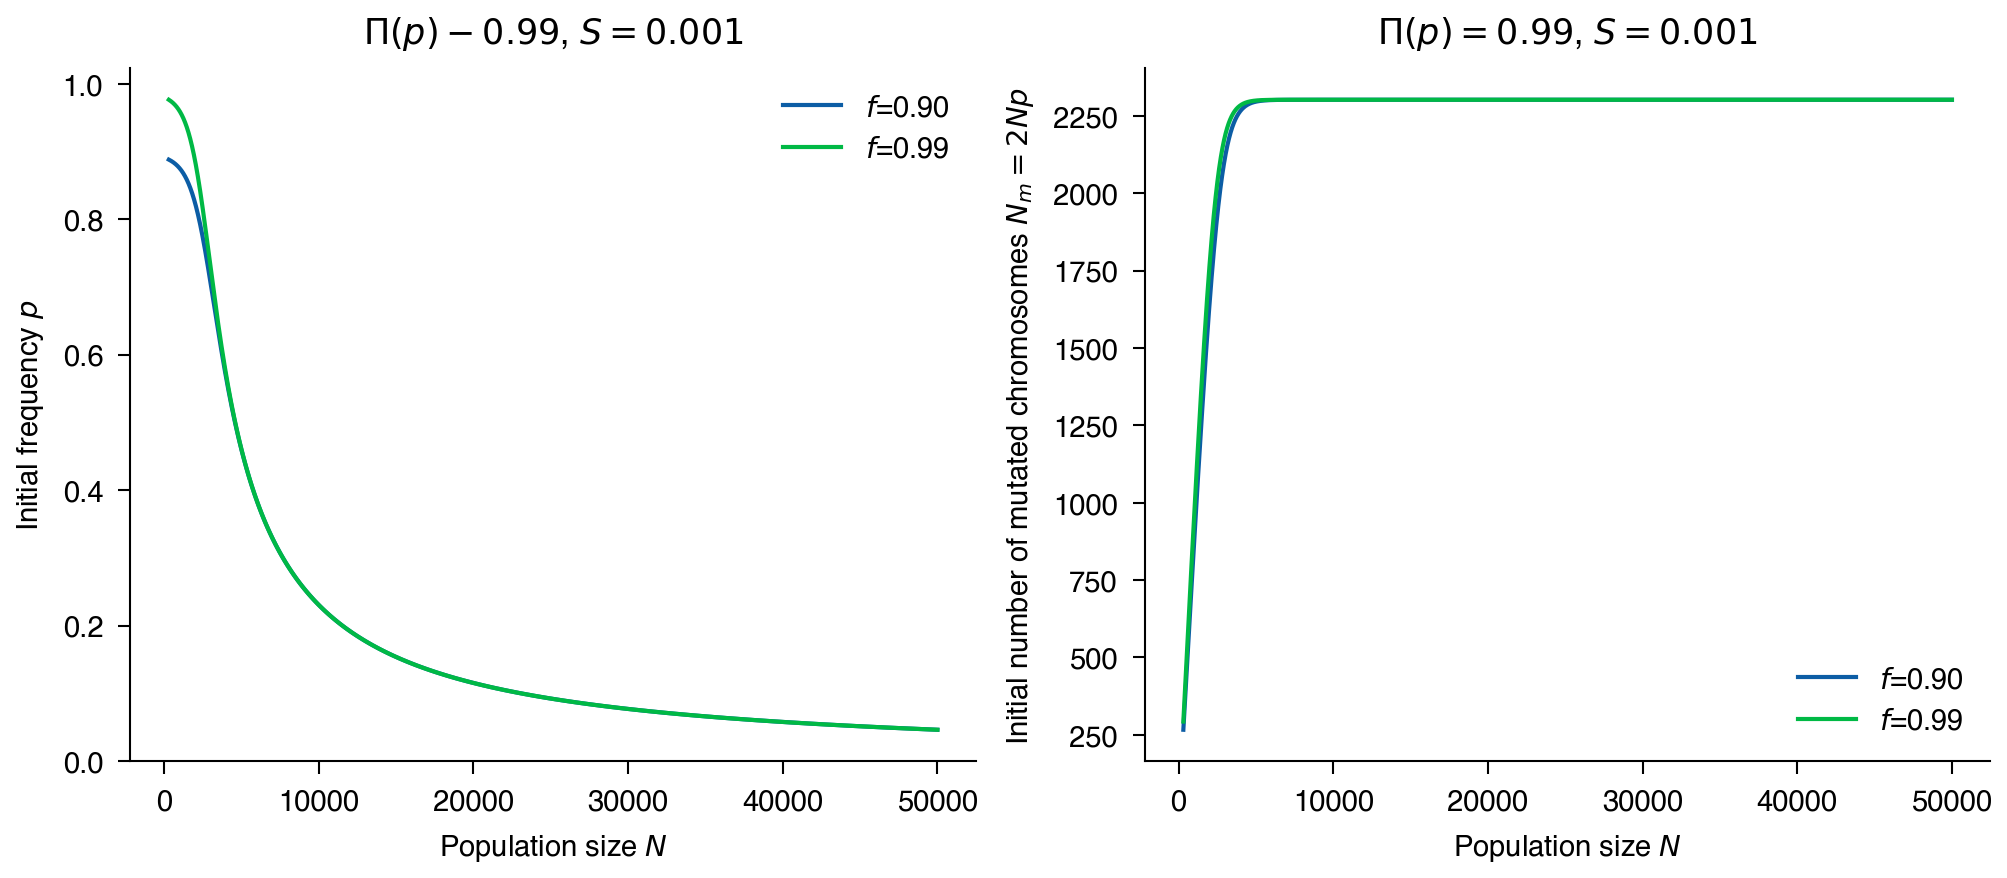

In [54]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,3)

N = np.arange(300,5e4)
S = 0.001
f = 0.90

for f in [0.90,0.99]:
    p_fixation = 0.99
    ax[0].set_ylabel(r"Initial frequency $p$")
    ax[0].set_xlabel("Population size $N$")
    ax[0].set_title(r"$\Pi(p)-0.99$, $S=0.001$")
    sns.lineplot(x=N,y=initial_freq_near_fixation(N,S,f,p_fixation),ax=ax[0],
                 label=f"$f$={f:.2f}")

    ax[1].set_ylabel(r"Initial number of mutated chromosomes $N_m=2Np$")
    ax[1].set_xlabel("Population size $N$")
    ax[1].set_title(r"$\Pi(p)=0.99$, $S=0.001$")
    sns.lineplot(x=N,y=N*initial_freq_near_fixation(N,S,f,p_fixation),ax=ax[1],
                 label=f"$f$={f:.2f}")


The actual number of mutated chromosomes $N_m=2Np$
$$N_m=Np=-\frac{1}{S}\ln[1-\Pi(p)\left(1-e^{-2NSf}\right)]$$

In the limit of large $N$, the exponent term $e^{-2NSf}\to 0$, and the actual number of mutated chromosomes will not depend on the population size.
$$\lim_{N\to\infty}N_m=-\frac{1}{S}\ln[1-\Pi(p)]$$

The initial frequency for near-fixation decreases with population size. For large populations, mutations that exceed a constant threshold $N_m$ are fixed with high (99\%) probability.